In [1]:
tr2<-read.table('qual_by_bpTR2.txt')

In [4]:
levels(tr2$name)

[1] "M186-C1_S4_L001_R1_001_fastqc"       
 [2] "M186-C1_S4_L001_R2_001_fastqc"       
 [3] "M186C1_S4_L001_R1_001_fastqc"        
 [4] "M186C1_S4_L001_R2_001_fastqc"        
 [5] "M199-C2_S7_L001_R1_001_fastqc"       
 [6] "M199-C2_S7_L001_R2_001_fastqc"       
 [7] "M199C2_S7_L001_R1_001_fastqc"        
 [8] "M199C2_S7_L001_R2_001_fastqc"        
 [9] "M200-C3_S11_L001_R1_001_fastqc"      
[10] "M200-C3_S11_L001_R2_001_fastqc"      
[11] "M200C3_S11_L001_R1_001_fastqc"       
[12] "M200C3_S11_L001_R2_001_fastqc"       
[13] "M231-C2_S8_L001_R1_001_fastqc"       
[14] "M231-C2_S8_L001_R2_001_fastqc"       
[15] "M231C2_S8_L001_R1_001_fastqc"        
[16] "M231C2_S8_L001_R2_001_fastqc"        
[17] "M234-C2_S5_L001_R1_001_fastqc"       
[18] "M234-C2_S5_L001_R2_001_fastqc"       
[19] "M234C2_S5_L001_R1_001_fastqc"        
[20] "M234C2_S5_L001_R2_001_fastqc"        
[21] "M236-C2_S6_L001_R1_001_fastqc"       
[22] "M236-C2_S6_L001_R2_001_fastqc"       
[23] "M236C2_S6_L001_R1_001_fastqc"        
[24] "M236C2_S6_L001_R2_001_fastqc"        
[25] "M250-C2_S3_L001_R1_001_fastqc"       
[26] "M250-C2_S3_L001_R2_001_fastqc"       
[27] "M250C2_S3_L001_R1_001_fastqc"        
[28] "M250C2_S3_L001_R2_001_fastqc"        
[29] "M477-C1_S9_L001_R1_001_fastqc"       
[30] "M477-C1_S9_L001_R2_001_fastqc"       
[31] "M477C1_S9_L001_R1_001_fastqc"        
[32] "M477C1_S9_L001_R2_001_fastqc"        
[33] "M480-C1_S2_L001_R1_001_fastqc"       
[34] "M480-C1_S2_L001_R2_001_fastqc"       
[35] "M480C1_S2_L001_R1_001_fastqc"        
[36] "M480C1_S2_L001_R2_001_fastqc"        
[37] "Undetermined_S0_L001_R1_001_fastqc"  
[38] "Undetermined_S0_L001_R2_001_fastqc"  
[39] "Z11a-20140702_S10_L001_R1_001_fastqc"
[40] "Z11a-20140702_S10_L001_R2_001_fastqc"

In [3]:
colnames(tr2)<-c("name","bp","mean","median","lower","upper","p10","p90")

In [5]:
tr2$read<-NA
reads<-sapply(tr2$name,function(x){unlist(strsplit(as.character(x),split="_"))})


In [8]:
head(reads)

M480C1,S2,L001,R1,001,fastqc
M480C1,S2,L001,R1,001,fastqc
M480C1,S2,L001,R1,001,fastqc
M480C1,S2,L001,R1,001,fastqc
M480C1,S2,L001,R1,001,fastqc
M480C1,S2,L001,R1,001,fastqc


In [7]:
reads<-t(reads)

In [10]:
reads2<-paste(reads[,1],"_",reads[,4],sep="")
tr2$read<-as.factor(reads2)


In [11]:
head(tr2)

,name,bp,mean,median,lower,upper,p10,p90,read
1,M480C1_S2_L001_R1_001_fastqc,1,33.32801,34,34,34,34,34,M480C1_R1
2,M480C1_S2_L001_R1_001_fastqc,2,33.56946,34,34,34,34,34,M480C1_R1
3,M480C1_S2_L001_R1_001_fastqc,3,33.61009,34,34,34,34,34,M480C1_R1
4,M480C1_S2_L001_R1_001_fastqc,4,33.65516,34,34,34,34,34,M480C1_R1
5,M480C1_S2_L001_R1_001_fastqc,5,33.6478,34,34,34,34,34,M480C1_R1
6,M480C1_S2_L001_R1_001_fastqc,6,37.19864,38,38,38,36,38,M480C1_R1


In [12]:
plt.tr<-function(a){
require(ggplot2)    
p<-ggplot()+geom_point(data=a,aes(x=bp,y=median),size=2,color="red")+geom_point(data=a,aes(x=bp,y=lower),size=1,color="blue")+geom_point(data=a,aes(bp,y=upper),color="blue",size=1)+geom_point(data=a,aes(bp,p10),color="black",size=1)+geom_point(data=a,aes(bp,p90),color="black",size=1)
return(p)}

In [16]:
tr2$bp<-factor(tr2$bp,levels(tr2$bp)[c(1,14,23,26,29,31,33,35,37,2,8,15,21,24,25,27,28,30,32,34,36,38,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,22)])


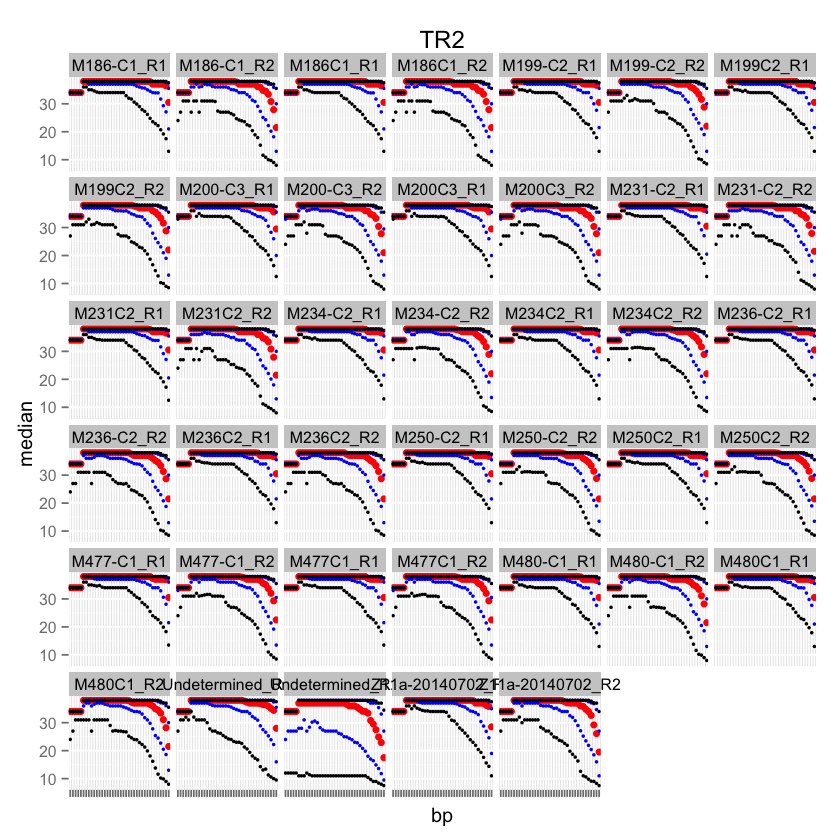

In [23]:
plt.tr(tr2)+facet_wrap(~read)+theme(axis.text.x=element_blank())+labs(title="TR2")
# Description: Sequence quality plotted against read base pairs from the 5' end for samples run in TR2. 
# The red points are the median quality scores. The blue lines are the upper and lower quartiles
# and the black lines are the 10th and 90th percentiles

In [ ]:
tr3<-read.table()